In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import random
import sklearn as sk
import matplotlib.pyplot as plt
import math
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the data from csv files
df_train = pd.read_csv("thylus_train.csv")
df_test = pd.read_csv("thylus_test.csv")

In [3]:
# Display of first 5 rows of train data
df_train.head()

,ID,X,Y,Force
0,2274,-18.043505,-21.571446,48.009433
1,505,20.323790,-43.686711,226.620250
2,6846,-3.934242,35.585698,150.331932
3,137,-9.319915,-48.287286,276.447470
4,2801,-4.999375,-14.983123,30.244477


In [4]:
# Display of first 5 rows of test data
df_test.head()

,ID,X,Y
0,17775,-19.913124,-27.780972
1,3230,-12.443781,-45.962450
2,16284,-18.857861,-29.644746
3,28567,-25.466193,-14.290804
4,7803,-3.240416,-40.246128


In [5]:
# Parameters of train data
df_train.describe()

,ID,X,Y,Force
count,8000.00000,8.000000e+03,8.000000e+03,8000.000000
mean,3999.50000,9.321433e-16,1.615597e-15,100.024635
std,2309.54541,1.732376e+01,2.887293e+01,89.678183
min,0.00000,-3.000000e+01,-5.000000e+01,-7.975457
25%,1999.75000,-1.500000e+01,-2.500000e+01,18.668546
50%,3999.50000,0.000000e+00,0.000000e+00,75.086378
75%,5999.25000,1.500000e+01,2.500000e+01,168.301595
max,7999.00000,3.000000e+01,5.000000e+01,306.284600


In [6]:
# Check if there are any null values in train data
df_train.isna().sum()

ID       0
X        0
Y        0
Force    0
dtype: int64

In [7]:
# Check if there are any null values in test data
df_test.isna().sum()

ID    0
X     0
Y     0
dtype: int64

In [8]:
# Function to plot outliers
def outlierPlot(p):
    sns.boxplot(x=p)
    plt.figure(figsize=(16,5))
    #plt.subplot(1,2,1)
    #sns.displot(p)

# Function for getting upper and lower limit
def upperLower(dfcolumnName):
    percentile25 = dfcolumnName.quantile(0.25)
    percentile75 = dfcolumnName.quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75_MinWaterTemp + 1.5 * iqr
    lower_limit = percentile25_MinWaterTemp - 1.5 * iqr
    return upper_limit,lower_limit

# Functopn for caaping i.e removing outliers
def capping(df,upper_limit,lower_limit,column_name):
    new_df_cap = df.copy()
    new_df_cap[column_name] = np.where(
    new_df_cap[column_name] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap[column_name] < lower_limit,
        lower_limit,
        new_df_cap[column_name]
        )
    )
    return new_df_cap[column_name]

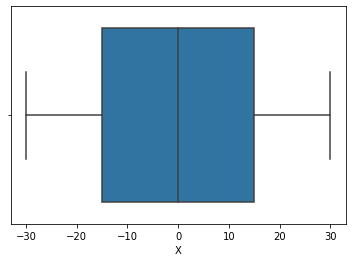

<Figure size 1152x360 with 0 Axes>

In [9]:
# Check if any outliers are present in train data using box plot
outlierPlot(df_train["X"])

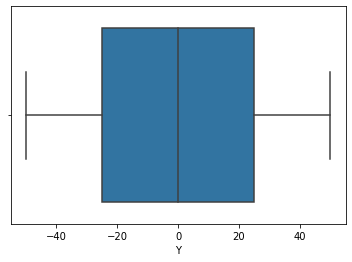

<Figure size 1152x360 with 0 Axes>

In [10]:
# Check if any outliers are present in train data using box plot
outlierPlot(df_train["Y"])

Since there are no outliers and null values in the data set, we can plot the data in 3D to check it

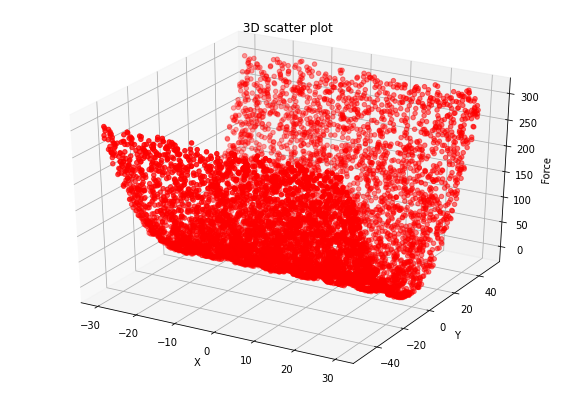

In [11]:
# Checking the data in 3D
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(df_train["X"],df_train["Y"],df_train["Force"],color = "red")
plt.title(" 3D scatter plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Force")
plt.show()

In [12]:
# Selecting train features to standardise
train_set = df_train[["X","Y"]]


In [13]:
# Standardizing train set features
scaler = StandardScaler()
scaled = scaler.fit_transform(train_set)
print(scaled.shape)

(8000, 2)


In [14]:
# Concatinating data to make train set
train_set1 = pd.DataFrame(scaled,columns=['X','Y'])
train_set2 = df_train[["ID","Force"]]
train_set = pd.concat([train_set1,train_set2], axis=1, join='inner')

In [15]:
train_set.shape

(8000, 4)

In [16]:
# Standardizing test set features
test_set = df_test[['X','Y']]
scaled= scaler.transform(test_set)
print(scaled.shape)

(80000, 2)


In [17]:
# Concatinating test set after standardisation of features
test_set1 = pd.DataFrame(scaled,columns=['X','Y'])
test_set2 = df_test[["ID"]]
test_set = pd.concat([test_set1,test_set2], axis=1, join='inner')

In [18]:
test_set.shape

(80000, 3)

In [19]:
# Selecting features of train set to train
x_train = train_set[['X','Y']]
y_train = train_set[['Force']]

In [20]:
# Selecting features of test set to test
x_test = test_set[['X','Y']]
(x_test.shape)

(80000, 2)

## Using linear regression

In [21]:
from sklearn.linear_model import LinearRegression
#lr = LinearRegression()
#lr.fit(x_train,y_train)
#y_hat = lr.predict(test_set1)

## Using svr

In [22]:
"""from sklearn.svm import LinearSVR
regressor = LinearSVR(C=500,max_iter=10000)
regressor.fit(x_train,y_train)
y_hat = regressor.predict(test_set1)"""

'from sklearn.svm import LinearSVR\nregressor = LinearSVR(C=500,max_iter=10000)\nregressor.fit(x_train,y_train)\ny_hat = regressor.predict(test_set1)'

## using knn regressor

In [23]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors =4,weights='distance')
model.fit(x_train, y_train)  #fit the model
y_hat=model.predict(x_test) #make prediction on test set

## using bayesian regression

In [24]:
"""from sklearn import linear_model
model = linear_model.BayesianRidge(n_iter=1000)
model.fit(x_train, y_train)  #fit the model
y_hat=model.predict(test_set1) #make prediction on test set"""

'from sklearn import linear_model\nmodel = linear_model.BayesianRidge(n_iter=1000)\nmodel.fit(x_train, y_train)  #fit the model\ny_hat=model.predict(test_set1) #make prediction on test set'

## Using polynomial regression

In [25]:
"""from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x_train,y_train)
y_hat = polyreg.predict(x_test)"""

'from sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.linear_model import LinearRegression\ndegree=2\npolyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())\npolyreg.fit(x_train,y_train)\ny_hat = polyreg.predict(x_test)'

## Generation of csv

In [26]:
y_hat.shape

(80000, 1)

In [27]:
df_test["Force"] = y_hat

In [28]:
to_submit = df_test[["ID","Force"]]

In [29]:
to_submit.to_csv("first_submission.csv",index=False)

**Top submissions are made using knn regressor with k=4 (Public score : 10.40542 and private score: 10.38535), polynomial regression with degree=2 with(Public score : 23.87307 and private score: 24.05516) but tried all the above models with different hyperparameters**